In [84]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, IndexToString
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import time
from pyspark.sql.functions import col, count, when
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

In [2]:
 spark = SparkSession.builder \
 .master("local") \
 .appName("Exercise1") \
    .getOrCreate()
 

In [78]:
# pwd

In [4]:
df = spark.read.csv("/home/jovyan/e_shop_clothing_2008.csv", header=True, inferSchema=True, sep=';')

In [77]:
# df.show(1, vertical=True)

In [80]:
df.printSchema()

root
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- order: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- session_id: integer (nullable = true)
 |-- page_1: integer (nullable = true)
 |-- colour: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- model_photography: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- price_2: integer (nullable = true)
 |-- page: integer (nullable = true)
 |-- label: float (nullable = true)



In [7]:
# df.describe().show(vertical=True)

In [9]:
# df.distinct().count()

In [10]:
# df.count()

In [11]:
# missing_val = df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns])
# missing_val.show()
# print(type(missing_val))

In [12]:
# missing_val = df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns]).toPandas()
# print(missing_val)
# print(type(missing_val))

In [14]:
# country_counts = df.groupBy("country").count().orderBy("count", ascending=False).toPandas()
# plt.figure(figsize=(10, 6)) 
# plt.bar(country_counts["country"], country_counts["count"])
# plt.xlabel("Country")
# plt.ylabel("Number of Orders")
# plt.title("Distribution of Orders by Country")
# plt.show()

In [15]:
# color_counts = df.groupBy("colour").count().orderBy("count", ascending=True).toPandas()
# plt.figure(figsize=(10, 6)) 
# plt.bar(color_counts["colour"], color_counts["count"])
# plt.xlabel("Colours")
# plt.ylabel("Number of Orders")
# plt.title("Distribution of Orders by Colour")
# plt.show()

In [16]:
# price_counts = df.groupBy("price").count().orderBy("count", ascending=True).toPandas()
# plt.figure(figsize=(10, 6)) 
# plt.bar(price_counts["price"], price_counts["count"])
# plt.xlabel("US Price")
# plt.ylabel("Number of Orders")
# plt.title("Distribution of Orders by US Price")
# plt.show()

In [17]:
### INDEXING EXAMPLE ###

In [18]:
#Indexing is for when we have categorical data. Here, most of the 
#data is already represented as integer.
#We can skip indexing unless we want to use Page 2 in our analysis

In [19]:
### PREDICTING PRICE FROM COUNTRY AND COLOUR

In [20]:
#18-82
price_ranges = [(18, 34), (34, 50), (50, 66), (66, 82)]

main_categories = ['1', '2', '3', '4']

results = {}

for category in main_categories:
    category_results = {}
    category_data = df.filter(df['page 1 (main category)'] == category)
    total_category_count = category_data.count()
    for price_range in price_ranges:
        min_price, max_price = price_range
        # Filter data for the main category and price range
        filtered_data = category_data.filter((df['price'] >= min_price) & (df['price'] < max_price))
        # Calculate count and probability percentage for the price range
        range_count = filtered_data.count()
        probability_percentage = (range_count / total_category_count) * 100 if total_category_count != 0 else 0
        # Store probability percentage in dictionary
        category_results[price_range] = probability_percentage
    # Store category results in main dictionary
    results[category] = category_results

    
result = {}
for category, category_results in results.items():
    result[category] = {}
    for price_range, probability_percentage in category_results.items():
        result[category][price_range] = probability_percentage

print(result)

# # Print results (optional)
# for category, category_results in results.items():
#     print(f"\nMain Category: {category}")
#     for price_range, probability_percentage in category_results.items():
#         #here I want to save the results as key value
#         key = price_range
#         saved_results[key] = probability_percentage
#         print(f"Price Range {price_range}: Probability Percentage: {probability_percentage:.2f}%")

{'1': {(18, 34): 20.095693779904305, (34, 50): 46.286840094889634, (50, 66): 25.8674761770737, (66, 82): 3.884041654939488}, '2': {(18, 34): 1.1481982920224953, (34, 50): 34.633409706311184, (50, 66): 54.2959800041658, (66, 82): 9.92241199750052}, '3': {(18, 34): 39.850169790289556, (34, 50): 45.61007854421028, (50, 66): 14.06278352386137, (66, 82): 0.47696814163880036}, '4': {(18, 34): 45.809998193408525, (34, 50): 53.14217874932253, (50, 66): 1.0478230572689498, (66, 82): 0.0}}


<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'Probability Percentage')

Text(0.5, 1.0, 'Probability Percentage by Price Range and Main Category')

[Text(0.4, 0, '18-34'),
 Text(1.4, 0, '34-50'),
 Text(2.4, 0, '50-66'),
 Text(3.4, 0, '66-82')]

(array([0.4, 1.4, 2.4, 3.4]),
 [Text(0.4, 0, '18-34'),
  Text(1.4, 0, '34-50'),
  Text(2.4, 0, '50-66'),
  Text(3.4, 0, '66-82')])

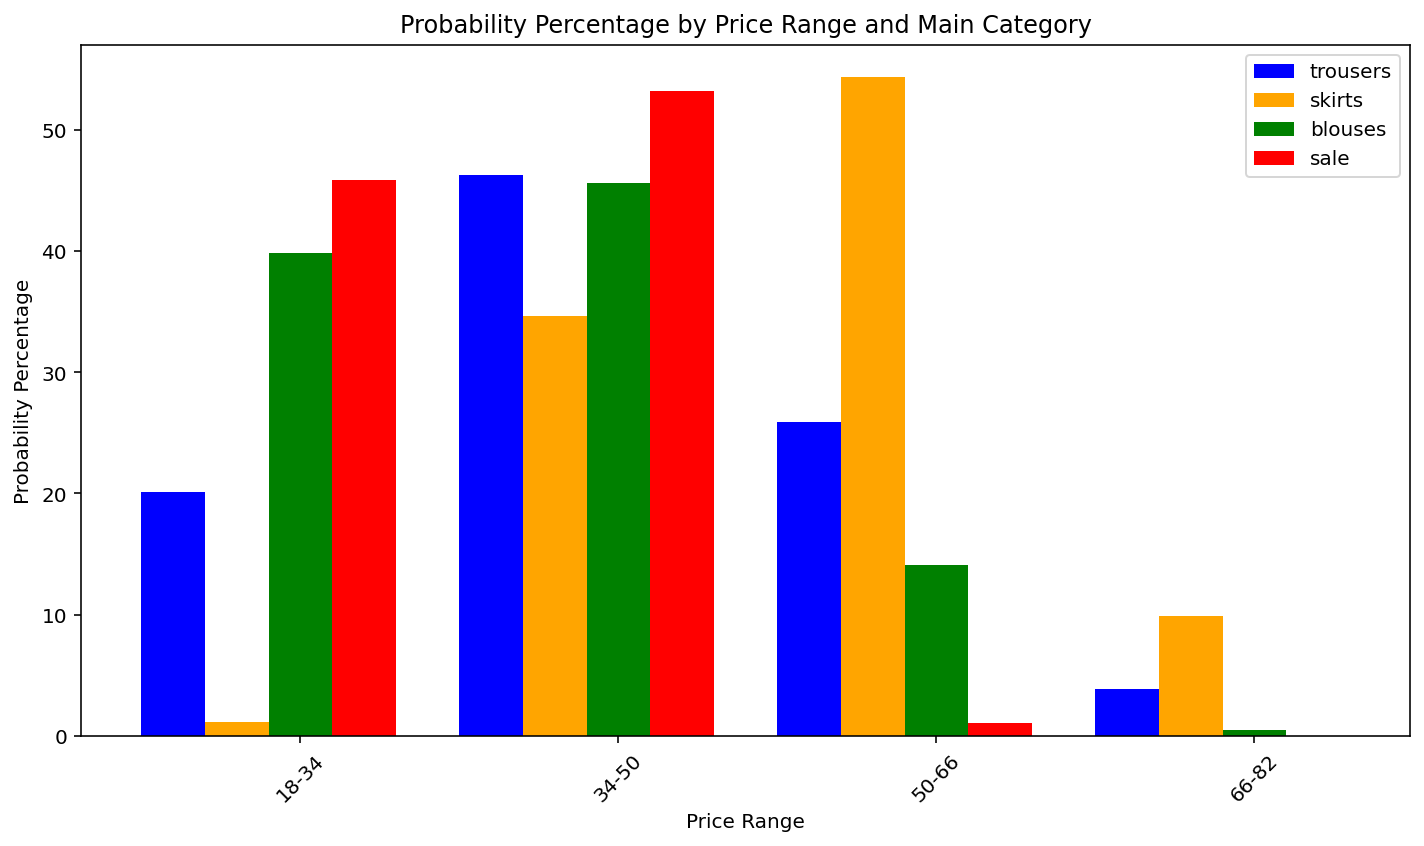

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Defining price ranges
price_ranges = [(18, 34), (34, 50), (50, 66), (66, 82)]

main_categories = ['1', '2', '3', '4']

color_map = ['blue', 'orange', 'green', 'red']

results = {category: {} for category in main_categories}

for category in main_categories:
    category_data = df.filter(df['page 1 (main category)'] == category)
    total_category_count = category_data.count()
    for price_range in price_ranges:
        min_price, max_price = price_range
        # Filter data for the main category and price range
        filtered_data = category_data.filter((df['price'] >= min_price) & (df['price'] < max_price))
        # Calculate count and probability percentage for the price range
        range_count = filtered_data.count()
        probability_percentage = (range_count / total_category_count) * 100 if total_category_count != 0 else 0
        results[category][price_range] = probability_percentage

price_range_labels = [f"{range[0]}-{range[1]}" for range in price_ranges]
category_labels = main_categories
data = np.array([[results[category][price_range] for price_range in price_ranges] for category in main_categories])

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(price_range_labels))

categories = ["trousers","skirts","blouses","sale"]

for i, category in enumerate(category_labels):
    ax.bar(index + i * bar_width, data[i], bar_width, label=categories[i], color=color_map[i])



ax.set_xlabel('Price Range')
ax.set_ylabel('Probability Percentage')
ax.set_title('Probability Percentage by Price Range and Main Category')
ax.set_xticks(index + bar_width * len(category_labels) / 2)
ax.set_xticklabels(price_range_labels)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
def get_probability_percentage(category, price):
    category_result = result.get(str(category))
    if category_result:
        for price_range, probability_percentage in category_result.items():
            if price_range[0] <= price < price_range[1]:
                return probability_percentage
    return 0.0

probability_percentage_udf = udf(get_probability_percentage, FloatType())

df = df.withColumn("probability_percentage", probability_percentage_udf(df['page 1 (main category)'], df['price']))

df.show()

+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+----------------------+
|year|month|day|order|country|session ID|page 1 (main category)|page 2 (clothing model)|colour|location|model photography|price|price 2|page|probability_percentage|
+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+----------------------+
|2008|    4|  1|    1|     29|         1|                     1|                    A13|     1|       5|                1|   28|      2|   1|             20.095694|
|2008|    4|  1|    2|     29|         1|                     1|                    A16|     1|       6|                1|   33|      2|   1|             20.095694|
|2008|    4|  1|    3|     29|         1|                     2|                     B4|    10|       2|                1|   52|      1|   1|              54.29598|
|2008|    

In [23]:
df = df.selectExpr("cast(month as integer) month",
                          "cast(day as integer) day",
                          "cast(order as integer) order",
                          "cast(country as integer) country",
                          "cast(`session ID` as integer) session_id",
                          "cast(`page 1 (main category)` as integer) page_1",
                          "cast(colour as integer) colour",
                          "cast(location as integer) location",
                          "cast(`model photography` as integer) model_photography",
                          "cast(price as integer) price",
                          "cast(`price 2` as integer) price_2",
                          "cast(page as integer) page",
                          "cast(probability_percentage as float) label")

In [29]:
vectorAssembler = VectorAssembler(inputCols = ['month', 'day', 'country', 'order', 'session_id', 'page_1', 'colour', 'location', 'model_photography', 'price', 'price_2',
                                              'page'], outputCol="features")

In [30]:
vectorized_df = vectorAssembler.transform(df)

In [31]:
vectorized_df.show()

+-----+---+-----+-------+----------+------+------+--------+-----------------+-----+-------+----+---------+--------------------+
|month|day|order|country|session_id|page_1|colour|location|model_photography|price|price_2|page|    label|            features|
+-----+---+-----+-------+----------+------+------+--------+-----------------+-----+-------+----+---------+--------------------+
|    4|  1|    1|     29|         1|     1|     1|       5|                1|   28|      2|   1|20.095694|[4.0,1.0,29.0,1.0...|
|    4|  1|    2|     29|         1|     1|     1|       6|                1|   33|      2|   1|20.095694|[4.0,1.0,29.0,2.0...|
|    4|  1|    3|     29|         1|     2|    10|       2|                1|   52|      1|   1| 54.29598|[4.0,1.0,29.0,3.0...|
|    4|  1|    4|     29|         1|     2|     6|       6|                2|   38|      2|   1| 34.63341|[4.0,1.0,29.0,4.0...|
|    4|  1|    5|     29|         1|     2|     4|       3|                2|   52|      1|   1| 54.2959

In [32]:
dataset = vectorized_df.select("label", "features")

In [33]:
dataset.show()

+---------+--------------------+
|    label|            features|
+---------+--------------------+
|20.095694|[4.0,1.0,29.0,1.0...|
|20.095694|[4.0,1.0,29.0,2.0...|
| 54.29598|[4.0,1.0,29.0,3.0...|
| 34.63341|[4.0,1.0,29.0,4.0...|
| 54.29598|[4.0,1.0,29.0,5.0...|
|14.062783|[4.0,1.0,29.0,6.0...|
| 39.85017|[4.0,1.0,29.0,7.0...|
|53.142178|[4.0,1.0,29.0,8.0...|
|53.142178|[4.0,1.0,29.0,9.0...|
| 54.29598|[4.0,1.0,29.0,1.0...|
| 9.922412|[4.0,1.0,29.0,2.0...|
| 54.29598|[4.0,1.0,29.0,3.0...|
| 54.29598|[4.0,1.0,29.0,4.0...|
| 46.28684|[4.0,1.0,29.0,5.0...|
| 46.28684|[4.0,1.0,29.0,6.0...|
| 54.29598|[4.0,1.0,29.0,7.0...|
|53.142178|[4.0,1.0,29.0,8.0...|
|53.142178|[4.0,1.0,29.0,9.0...|
|53.142178|[4.0,1.0,29.0,10....|
| 34.63341|[4.0,1.0,21.0,1.0...|
+---------+--------------------+
only showing top 20 rows



In [34]:
### GRADIENT BOOSTED TREES ###

In [88]:
(trainData, testData) = dataset.randomSplit([0.7, 0.3])

In [89]:
print("Train sample: {}".format(trainData.count()))
print("Test sample: {}".format(testData.count()))

Train sample: 115723
Test sample: 49751


In [ ]:
gbt = GBTRegressor(featuresCol="features", maxIter=30, maxDepth = 11)
s = time.time()
model_direct = gbt.fit(trainData)
print(time.time() - s)

In [ ]:
pred_direct = model_direct.transform(testData)

In [ ]:
pred_direct.show(1)

In [ ]:
rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

In [ ]:
rmse_result = rmse.evaluate(pred_direct)

In [ ]:
rmse_result

In [ ]:
rsquare = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

In [ ]:
rsquare_result = rsquare.evaluate(pred_direct)

In [ ]:
rsquare_result

In [ ]:
df_pandas = pred_direct.toPandas()

# Extract labels and predicted values from Pandas DataFrame
labels = df_pandas['label'].tolist()
predicted_values = df_pandas['prediction'].tolist()


plt.figure(figsize=(8, 6))
plt.scatter(labels, predicted_values, color='blue')
plt.plot(labels, labels, color='red', linestyle='--')  # Plot y = x line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plotting features
plt.figure(figsize=(8, 6))
plt.bar(range(len(features[0])), features[0])
plt.title('Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.xticks(range(len(features[0])), ['month', 'day', 'country', 'order', 'session_id', 'page_1', 'colour', 'location', 
                                     'model_photography', 'price', 'price_2',
                                     'page'])
plt.grid(True)
plt.show()

In [74]:
#---------------------------------

In [75]:
# from pyspark.sql.functions import avg
# avg_prices_month = df.groupBy("month").agg(avg("price").alias("avg_price")).orderBy("month")
# avg_prices_day = df.groupBy("month", "day").agg(avg("price").alias("avg_price")).orderBy("month", "day")

# # Convert DataFrame to Pandas for visualization
# avg_prices_month_pd = avg_prices_month.toPandas()
# avg_prices_day_pd = avg_prices_day.toPandas()

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Average Price of Clothing Items Over Months')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Price (US Dollars)')

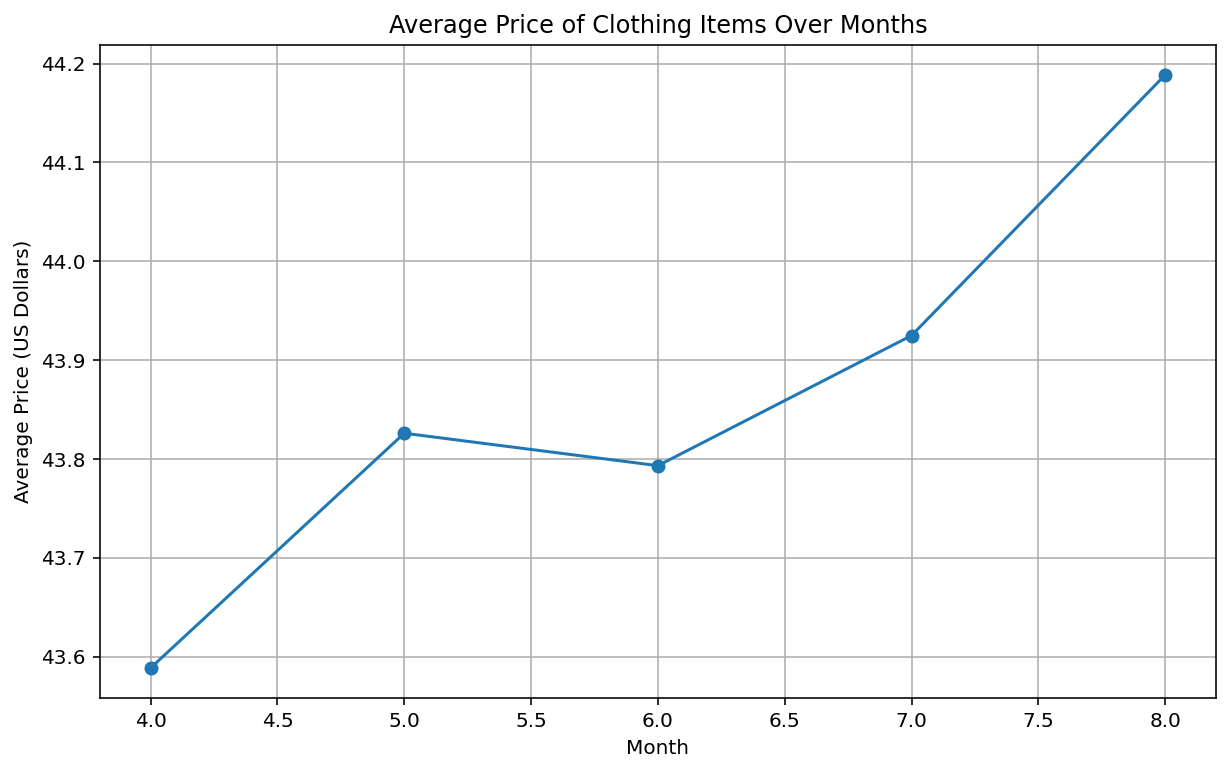

In [76]:
# # Visualizing trends in average prices over months
# plt.figure(figsize=(10, 6))
# plt.plot(avg_prices_month_pd["month"], avg_prices_month_pd["avg_price"], marker='o')
# plt.title("Average Price of Clothing Items Over Months")
# plt.xlabel("Month")
# plt.ylabel("Average Price (US Dollars)")
# plt.grid(True)
# plt.show()

In [133]:
#---------------------------------

In [136]:
# # Filter the dataset for each product category
# import seaborn as sns

# trousers_df = df.filter(df["page 1 (main category)"] == 1)
# skirts_df = df.filter(df["page 1 (main category)"] == 2)
# blouses_df = df.filter(df["page 1 (main category)"] == 3)
# sale_items_df = df.filter(df["page 1 (main category)"] == 4)

# # Calculate summary statistics for each category
# trousers_summary = trousers_df.select("price").summary().toPandas()
# skirts_summary = skirts_df.select("price").summary().toPandas()
# blouses_summary = blouses_df.select("price").summary().toPandas()
# sale_items_summary = sale_items_df.select("price").summary().toPandas()



In [145]:
# Concatenate DataFrames
# concatenated_df = trousers_df.union(skirts_df).union(blouses_df).union(sale_items_df)
# concatenated_pd = concatenated_df.toPandas()

In [146]:
# Plotting with Seaborn
# sns.set(style="whitegrid")

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='page 1 (main category)', ylabel='price'>

Text(0.5, 1.0, 'Price Distribution Across Product Categories')

Text(0.5, 0, 'Summary Statistic')

Text(0, 0.5, 'Price (US Dollars)')

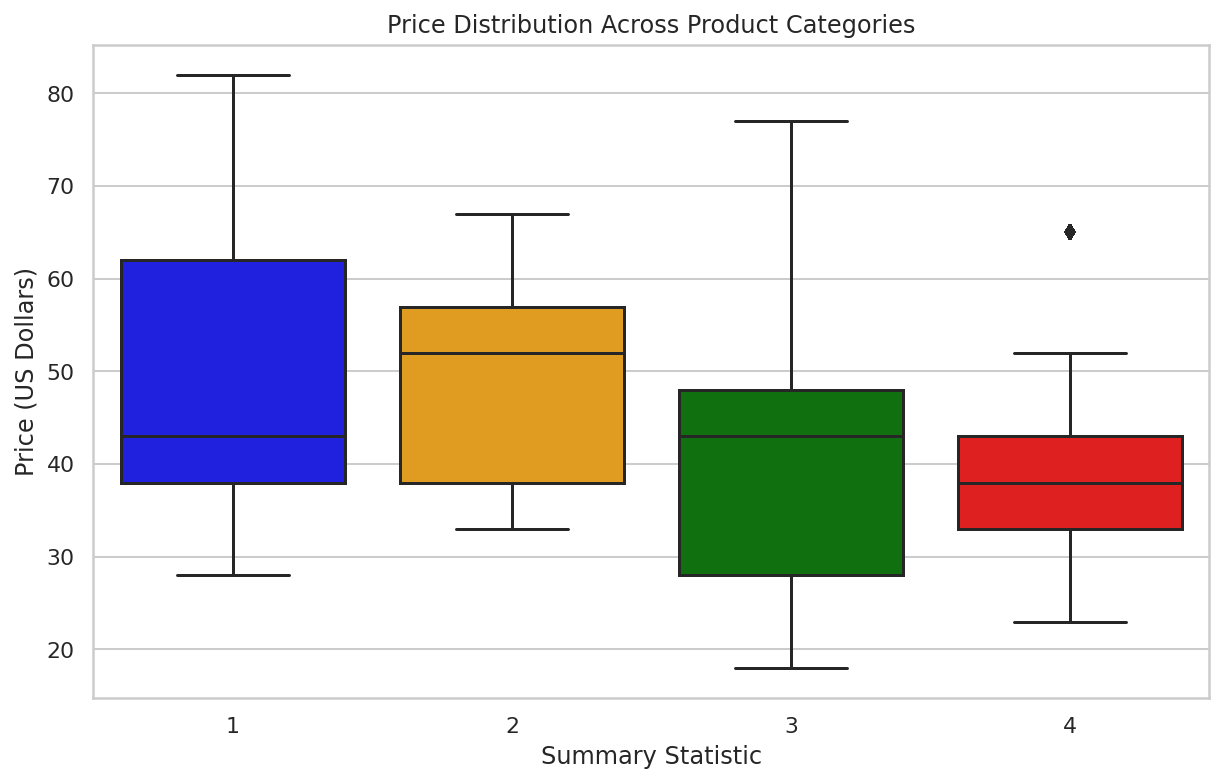

In [156]:
# Box plot for price distribution across different product categories
# colors = ["blue", "orange", "green", "red"]
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=concatenated_pd, x="page 1 (main category)", y="price", palette=colors)
# plt.title("Price Distribution Across Product Categories")
# plt.xlabel("Summary Statistic")
# plt.ylabel("Price (US Dollars)")
# # plt.legend(labels=["Trousers", "Skirts", "Blouses", "Sale Items"], title="Product Category", loc="upper right")
# plt.show()

In [158]:

# average_price_per_color = df.groupBy("colour").agg(F.avg("price").alias("average_price"))
# average_price_per_color.show()

+------+------------------+
|colour|     average_price|
+------+------------------+
|    12|50.429218573046434|
|     1|39.862170841361596|
|    13|41.875933280381254|
|     6|40.566491187914856|
|     3|   49.280426535425|
|     5|38.539292141571686|
|     9| 40.48865567955066|
|     4| 40.11588060785857|
|     8| 30.24662162162162|
|     7| 35.01425247236766|
|    10|              52.0|
|    11|48.944822373393805|
|    14|40.053704749356925|
|     2|46.987904851498456|
+------+------------------+



<Figure size 720x432 with 0 Axes>

<BarContainer object of 14 artists>

Text(0.5, 0, 'Color')

Text(0, 0.5, 'Average Price (US Dollars)')

Text(0.5, 1.0, 'Average Price by Color')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

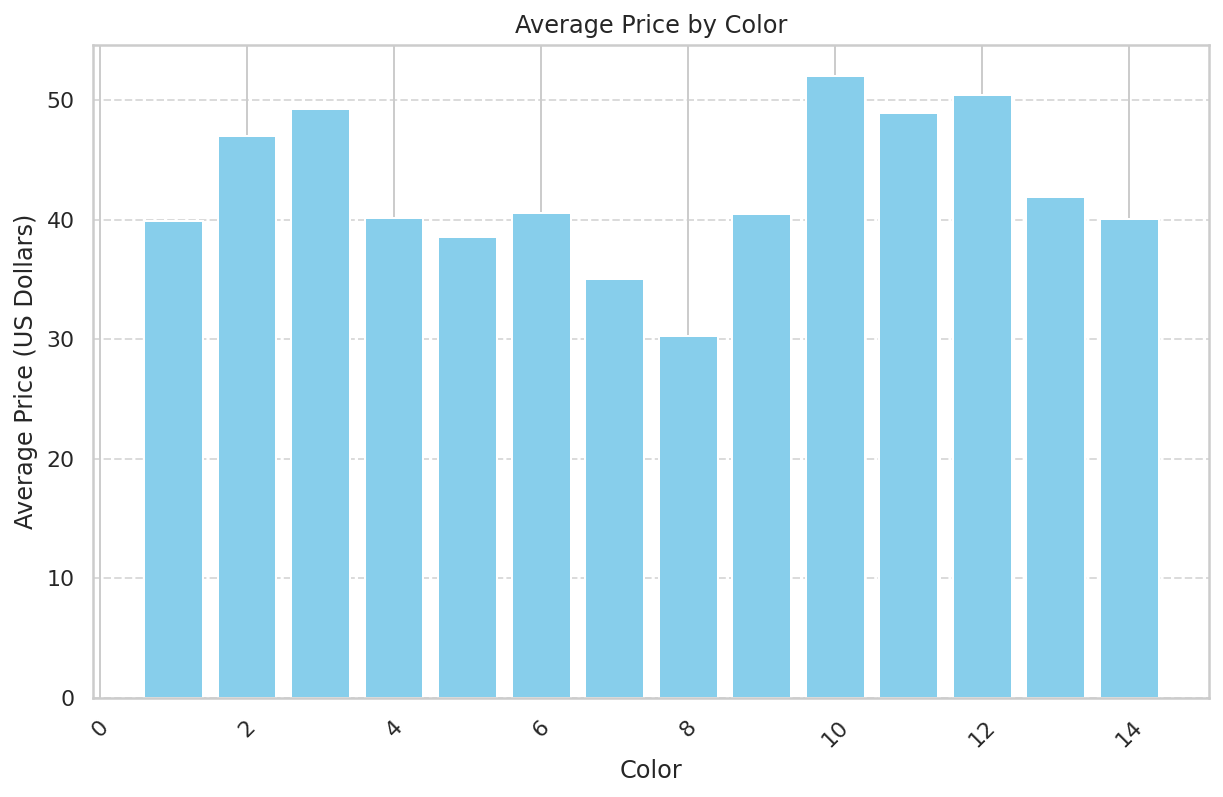

In [160]:
# colors = average_price_per_color.select("colour").rdd.flatMap(lambda x: x).collect()
# average_prices = average_price_per_color.select("average_price").rdd.flatMap(lambda x: x).collect()

# plt.figure(figsize=(10, 6))
# plt.bar(colors, average_prices, color='skyblue')
# plt.xlabel('Color')
# plt.ylabel('Average Price (US Dollars)')
# plt.title('Average Price by Color')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f92ea2864c0>,
 [Text(-0.6752609996115092, -0.8683447370737416, 'Yes'),
  Text(0.675261080911808, 0.8683446738512403, 'No')],
 [Text(-0.3683241816062777, -0.47364258385840446, '51.2%'),
  Text(0.3683242259518953, 0.47364254937340367, '48.8%')])

Text(0.5, 1.0, 'Distribution of Price 2')

(-1.1103713936581676,
 1.1284264082776048,
 -1.1104875237013025,
 1.1232693829030849)

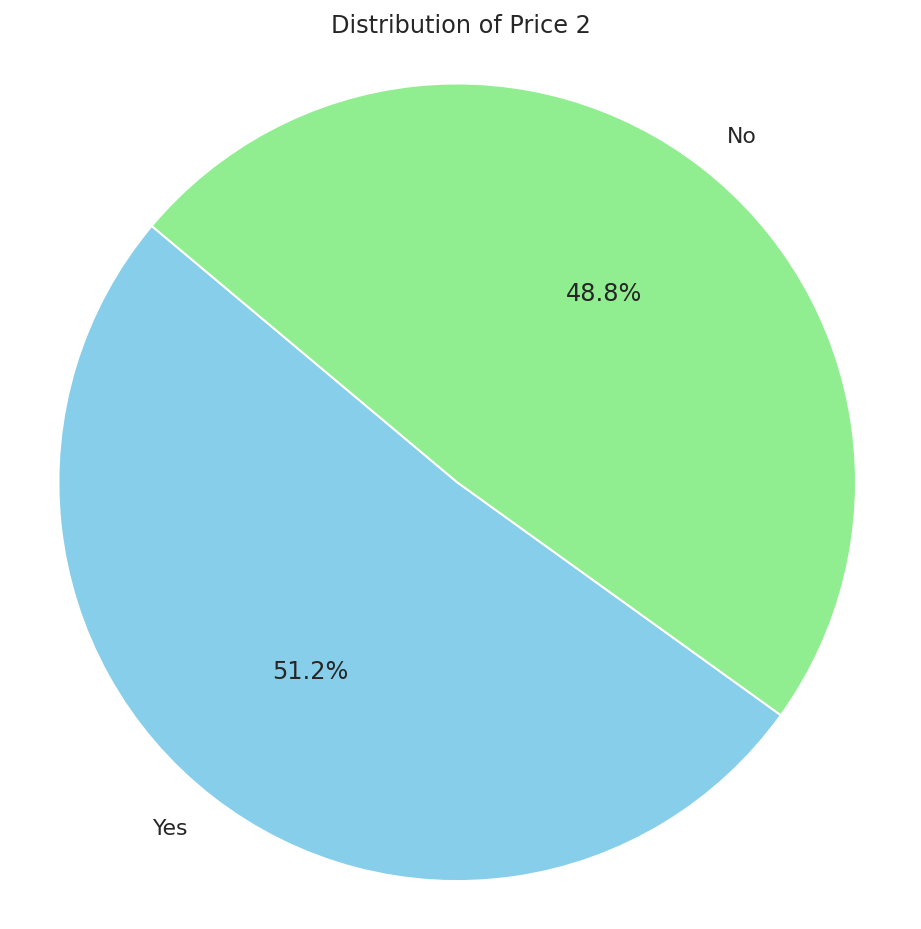

In [163]:
# The counts for each category of PRICE 2
# price_2_counts = df.groupBy("price 2").count().orderBy("price 2").collect()
# price_2_values = [row["count"] for row in price_2_counts]
# price_2_labels = ["Yes" if row["price 2"] == 1 else "No" for row in price_2_counts]

# The pie chart for PRICE 2
# plt.figure(figsize=(8, 8))
# plt.pie(price_2_values, labels=price_2_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
# plt.title('Distribution of Price 2')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f92ea2155e0>,
 [Text(-1.099005434430608, 0.046765960826126475, 'Top Left'),
  Text(-0.350123188889875, -1.0427913274483946, 'Top Middle'),
  Text(0.7261573050872882, -0.8262539369155025, 'Top Right'),
  Text(1.096382320656999, 0.08913925594693965, 'Bottom Left'),
  Text(0.4709565750691587, 0.994082443461873, 'Bottom Middle'),
  Text(-0.5068347822118363, 0.97627788233693, 'Bottom Right')],
 [Text(-0.5994575096894225, 0.02550870590515989, '20.9%'),
  Text(-0.19097628484902268, -0.5687952695173061, '20.2%'),
  Text(0.3960858027748844, -0.45068396559027407, '13.1%'),
  Text(0.5980267203583629, 0.04862141233469435, '16.5%'),
  Text(0.2568854045831775, 0.5422267873428398, '16.8%'),
  Text(-0.27645533575191067, 0.5325152085474163, '12.5%')])

Text(0.5, 1.0, 'Distribution of Location on Page')

(-1.1094340520674235,
 1.1117944722552835,
 -1.118766623635822,
 1.1128427370410015)

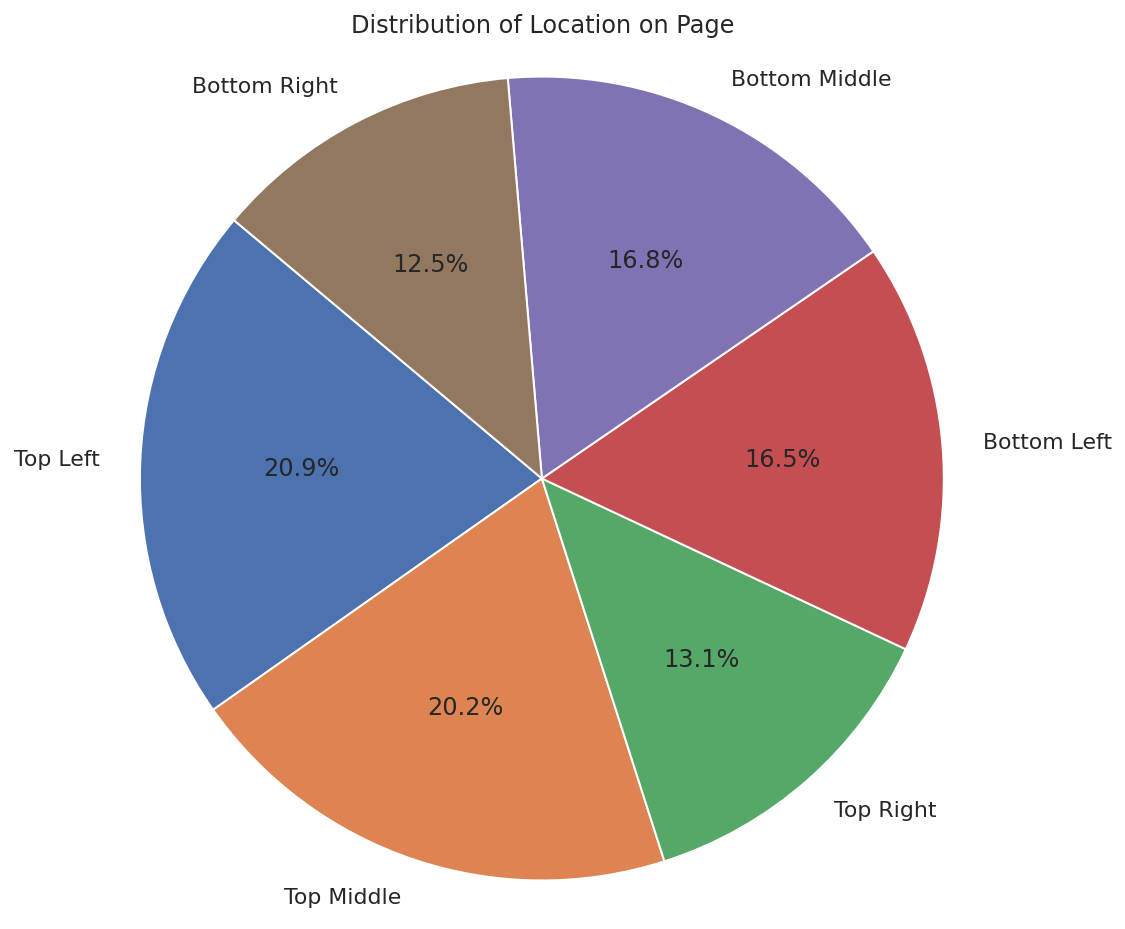

In [164]:
# The counts for each category of LOCATION
# location_counts = df.groupBy("location").count().orderBy("location").collect()
# location_values = [row["count"] for row in location_counts]
# location_labels = ["Top Left", "Top Middle", "Top Right", "Bottom Left", "Bottom Middle", "Bottom Right"]

# The pie chart for LOCATION
# plt.figure(figsize=(8, 8))
# plt.pie(location_values, labels=location_labels, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Location on Page')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f92ea1fd4f0>,
 [Text(-0.5222473471225626, -0.9681207096346228, 'Page 1'),
  Text(0.9716871917719767, 0.5155812267201841, 'Page 2'),
  Text(-0.0687884145687763, 1.0978470540203287, 'Page 3'),
  Text(-0.6186013835907695, 0.9095781045185651, 'Page 4'),
  Text(-0.8035611079365088, 0.7511920831663834, 'Page 5')],
 [Text(-0.2848621893395796, -0.5280658416188851, '56.5%'),
  Text(0.5300111955119873, 0.28122612366555494, '24.8%'),
  Text(-0.0375209534011507, 0.5988256658292701, '11.7%'),
  Text(-0.3374189365040561, 0.49613351155558094, '5.4%'),
  Text(-0.4383060588744593, 0.40974113627257275, '1.7%')])

Text(0.5, 1.0, 'Distribution of Page Numbers')

(-1.1122583573913363,
 1.1355612209070138,
 -1.1068812195940483,
 1.1063016834522703)

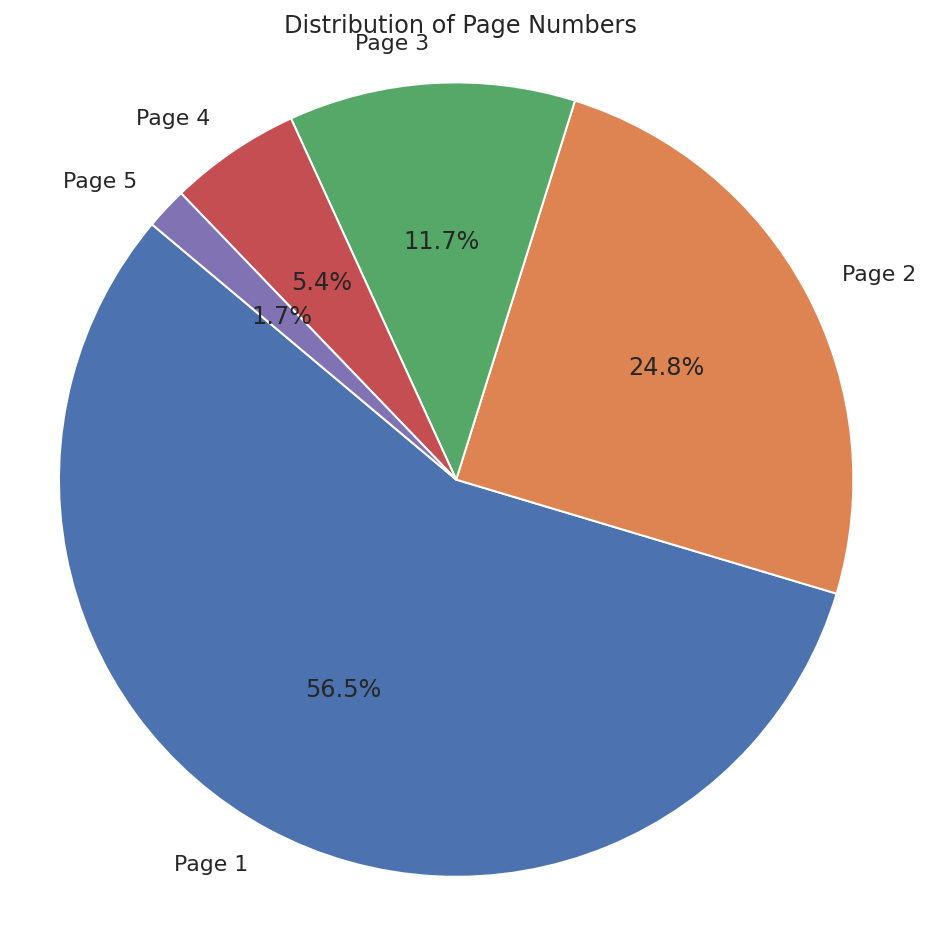

In [165]:
# The counts for each category of PAGE
# page_counts = df.groupBy("page").count().orderBy("page").collect()
# page_values = [row["count"] for row in page_counts]
# page_labels = [f"Page {row['page']}" for row in page_counts]

# The pie chart for PAGE
# plt.figure(figsize=(8, 8))
# plt.pie(page_values, labels=page_labels, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Page Numbers')
# plt.axis('equal')
# plt.show()